In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load dataset
df = pd.read_excel(r"C:\Users\LENOVO\Desktop\Data Analyst Projects\Numpy\Telco-Customer-Churn.xlsx")   # update filename if needed
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

In [4]:
# Step 2: Data Cleaning
# Convert 'TotalCharges' to numeric (some blank values may exist)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [5]:
# Encode Churn as 1 (Yes) and 0 (No)
df['Churn_Flag'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [5]:
# Step 3: Overall Churn Rate
churn_rate = df['Churn_Flag'].mean() * 100
print(f"\n📊 Overall Churn Rate: {churn_rate:.2f}%")


📊 Overall Churn Rate: 26.54%


In [6]:
# Step 4: Churn by Contract Type
contract_churn = df.groupby('Contract')['Churn_Flag'].mean() * 100
print("\n📊 Churn by Contract:\n", contract_churn)



📊 Churn by Contract:
 Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn_Flag, dtype: float64


In [9]:
# Step 5: Churn by Internet Service
internet_churn = df.groupby('InternetService')['Churn_Flag'].mean() * 100
print("\n Churn by Internet Service:\n", internet_churn)



 Churn by Internet Service:
 InternetService
DSL            18.959108
Fiber optic    41.892765
No              7.404980
Name: Churn_Flag, dtype: float64


In [33]:
# Step 6: Churn by Tenure Groups
df['TenureGroup'] = pd.cut(df['tenure'], 
                           bins=[0,12,24,48,72], 
                           labels=['0-12','13-24','25-48','49-72'])
tenure_churn = df.groupby('TenureGroup', observed=False)['Churn_Flag'].mean() * 100
print("\n📊 Churn by Tenure Group:\n", tenure_churn)
tenure_churn1 = df.groupby('TenureGroup', observed=True)['Churn_Flag'].mean() * 100
print("\n📊 Churn by Tenure Group:\n", tenure_churn1)


📊 Churn by Tenure Group:
 TenureGroup
0-12     47.678161
13-24    28.710938
25-48    20.388959
49-72     9.513176
Name: Churn_Flag, dtype: float64

📊 Churn by Tenure Group:
 TenureGroup
0-12     47.678161
13-24    28.710938
25-48    20.388959
49-72     9.513176
Name: Churn_Flag, dtype: float64


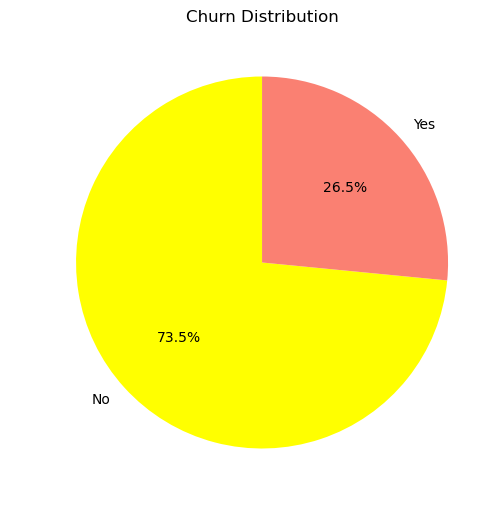

In [7]:
# Step 7: Visualizations

# Pie Chart - Churn Distribution
plt.figure(figsize=(6,8))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',
                                    startangle=90,
                                    colors=['yellow','salmon'])
plt.title("Churn Distribution")
plt.ylabel(" ")
plt.show()

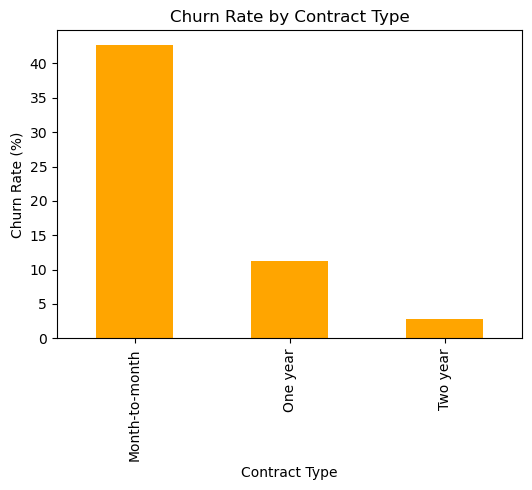

In [17]:
# Bar Chart - Contract vs Churn
plt.figure(figsize=(6,4))
contract_churn.plot(kind='bar', color='orange')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Contract Type")
plt.show()

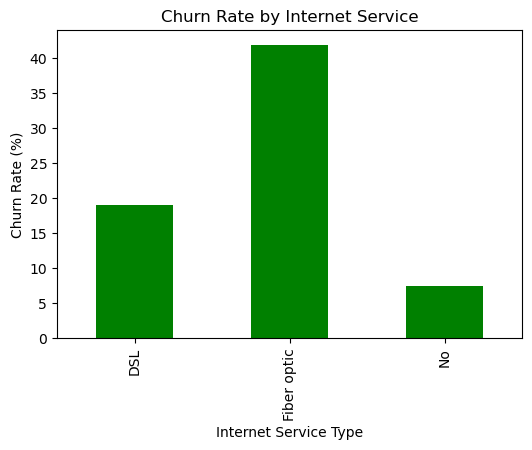

In [27]:
# Bar Chart - Internet Service vs Churn
plt.figure(figsize=(6,4))
internet_churn.plot(kind='bar', color='green')
plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Internet Service Type")
plt.show()


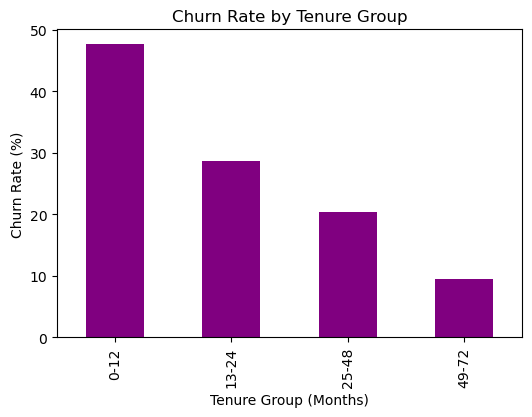

In [28]:
# Bar Chart - Tenure vs Churn
plt.figure(figsize=(6,4))
tenure_churn.plot(kind='bar', color='purple')
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Tenure Group (Months)")
plt.show()

In [29]:

# Step 8: Simple Rule-Based Prediction
# Rule: Month-to-Month contract + High Monthly Charges → likely churn
df['Predicted_Churn'] = np.where((df['Contract']=="Month-to-month") & 
                                 (df['MonthlyCharges']>80), 1, 0)



In [30]:
# Step 9: Accuracy of Rule
accuracy = np.mean(df['Predicted_Churn'] == df['Churn_Flag']) * 100
print(f"\n🤖 Simple Rule-Based Prediction Accuracy: {accuracy:.2f}%")


🤖 Simple Rule-Based Prediction Accuracy: 74.36%
